In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql3

sns.set(style="darkgrid")
ROOT_PATH="C:/Users/moshe/Documents/projectML/p1"
DATA_PATH = "%s/data/raw" % ROOT_PATH
DB_FILE = "%s/hairsalon.db" % DATA_PATH
def readSQL(query):
    import pandas as pd
    import sqlite3 as sql3
    db = sql3.connect(DB_FILE)
    df = pd.read_sql_query(query, db)
    db.close()
    return(df)

Retrieving data from superbooking table

In [215]:
superbooking=readSQL("""select * from superbooking""")
superbooking['clientdate']=superbooking['client']+superbooking['date']
nbappts=len(superbooking)
superbooking.columns

Index(['client', 'staff', 'service', 'date', 'time', 'timeint', 'description',
       'category', 'noshowflag', 'canceldate',
       ...
       'x8_BECKY', 'x8_HOUSE', 'x8_JJ', 'x8_JOANNE', 'x8_KELLY', 'x8_NA',
       'x8_SINEAD', 'x8_TANYA', 'visit', 'clientdate'],
      dtype='object', length=296)

In [216]:
superbooking[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()

,visit,firstapp,newcustomer,noshowflag,multipleappt,latecancellation
count,1799.0,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,1.0,0.509728,0.493052,0.080044,0.240689,0.046693
std,0.0,0.500044,0.500091,0.271437,0.427621,0.211038
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


<h2>various statistics

In [217]:
nbcustomers=len(superbooking['client'].unique())
avgapptday=len(superbooking)/len(superbooking['clientdate'].unique())
a,b,c=superbooking['noshowflag'].sum(),superbooking['latecancellation'].sum(),superbooking['visit'].sum()
print(['distinct customers',nbcustomers,'nb appts',c,'total noshows',a,'total late cancellations',b,a-b,((a-b)/a),(b/a)],avgapptday)

['distinct customers', 800, 'nb appts', 1799, 'total noshows', 144, 'total late cancellations', 84, 60, 0.4166666666666667, 0.5833333333333334] 1.1621447028423773


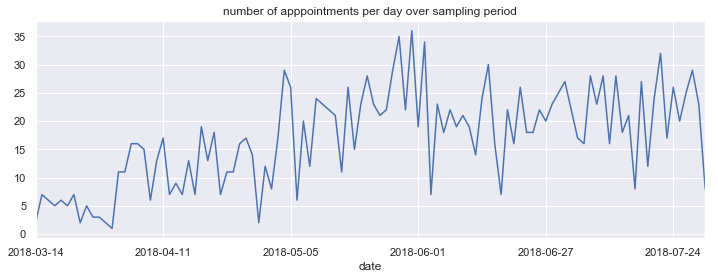

In [218]:
df=superbooking.copy()
df2=df.set_index(df['date'])
plt.figure(figsize=(12,4))
plt.title("number of apppointments per day over sampling period")
df2['visit'].groupby(['date']).sum().plot.line()

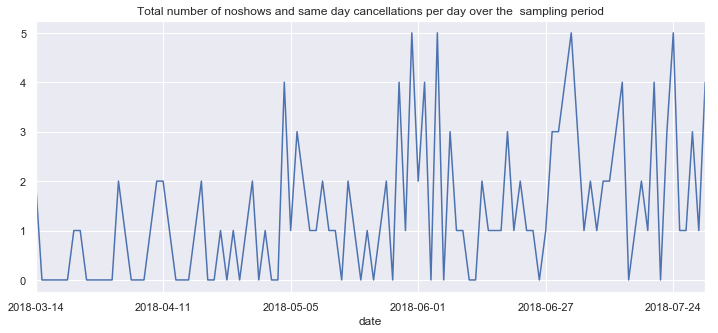

In [219]:
plt.figure(figsize=(12,5))
plt.title("Total number of noshows and same day cancellations per day over the  sampling period")
df2['noshowflag'].groupby(['date']).sum().plot()

In [220]:
df=readSQL("""select month,count(visit)/count(distinct date) avgapptsperday from superbooking group by month""")
df

,month,avgapptsperday
0,3,4
1,4,11
2,5,21
3,6,20
4,7,21


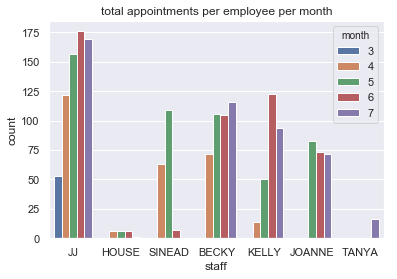

In [221]:
df=superbooking.copy()
plt.title("total appointments per employee per month")
ax = sns.countplot(x="staff",hue="month",data=df2)

Number of one time customers /recurring customers

In [222]:
query="""select client,count(distinct date) visit from superbooking
group by client having count(distinct date) = 1 order by visit desc"""
dfone=readSQL(query)
nbonetime=len(dfone)
nbonetime

458

In [223]:
superone=pd.merge(superbooking,dfone['client'],on='client',how='inner')
superone[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()
superone['clientdate']=superone['client']+superone['date']
len(superone)

520

In [224]:
len(superone['clientdate'].unique())

458

In [225]:
avgapptday=len(superone)/len(superone['clientdate'].unique())
a,b,c=superone['noshowflag'].sum(),superone['latecancellation'].sum(),superone['visit'].sum()
print([nbonetime,c,a,b,a-b,((a-b)/a),(b/a),avgapptday])

[458, 520, 35, 19, 16, 0.45714285714285713, 0.5428571428571428, 1.1353711790393013]


In [226]:
query="""select client,count(distinct date) visit from superbooking
group by client having count(distinct date) > 1 order by visit desc"""
dfmulti=readSQL(query)
nbmulti=len(dfmulti)
supermulti=pd.merge(superbooking,dfmulti['client'],on='client',how='inner')
supermulti['clientdate']=supermulti['client']+supermulti['date']
supermulti[['visit','firstapp','newcustomer','noshowflag','multipleappt','latecancellation']].describe()

,visit,firstapp,newcustomer,noshowflag,multipleappt,latecancellation
count,1279.0,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,1.0,0.311181,0.311181,0.085223,0.250977,0.050821
std,0.0,0.463158,0.463158,0.279322,0.433745,0.219718
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [227]:
avgapptday=len(supermulti)/len(supermulti['clientdate'].unique())
a,b,c=supermulti['noshowflag'].sum(),supermulti['latecancellation'].sum(),supermulti['visit'].sum()
print([nbmulti,c,a,b,a-b,((a-b)/a),(b/a),avgapptday])

[342, 1279, 109, 65, 44, 0.4036697247706422, 0.5963302752293578, 1.1733944954128441]


<h2> number of customers having multiple effective visits done in studied period

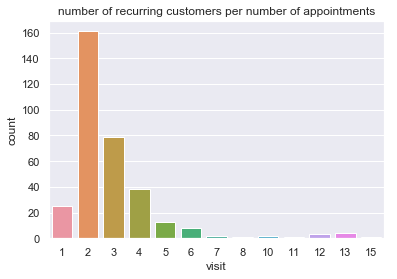

In [253]:
query="""select client, count(distinct date) visit from  superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1) and noshowflag=0  group by client"""
df=readSQL(query)
plt.title("number of recurring customers per number of effective appointments")
ax = sns.countplot(x="visit",data=df)

number of average effective visits per recurring customer

In [254]:
df.mean()

visit    2.973373
dtype: float64

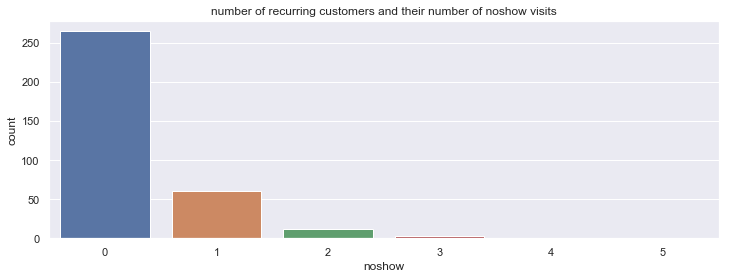

In [266]:
plt.figure(figsize=(12,4))
query="""select client, count(distinct date) noshow from superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1) and noshowflag=1 group by client
union select client, 0 noshow from superbooking where client in (select client from superbooking
group by client having count(distinct date) > 1 and  SUM(noshowflag)=0)"""
df=readSQL(query)
plt.title("number of recurring customers and their number of noshow visits")
ax = sns.countplot(x="noshow",data=df)

In [274]:
print(['average number of noshows/customer',df.mean()])

['average number of noshows/customer', noshow    0.298246
dtype: float64]


In [282]:
print(['customer with one no show ',(df[df['noshow']==1].count())/(df.count()),
      'customer with two no show at least',(df[df['noshow']>=2].count())/(df.count())])

['customer with one no show ', client    0.175439
noshow    0.175439
dtype: float64, 'customer with two no show at least', client    0.049708
noshow    0.049708
dtype: float64]


Distribution deltadays between appointments 

In [247]:
df=supermulti.copy()
df=df.loc[df.deltadaysappt!=0,:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadaysappt']]
df3.describe()

,deltadaysappt
count,722.000000
mean,32.004155
std,22.075680
min,1.000000
25%,14.000000
50%,29.000000
75%,43.000000
max,133.000000


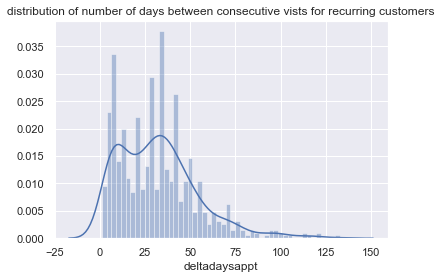

In [248]:
plt.title("distribution of number of days between consecutive vists for recurring customers")
ax=sns.distplot(df3.deltadaysappt,norm_hist=True,bins=50)

In [249]:
df3.deltadaysappt.mean()

32.00415512465374

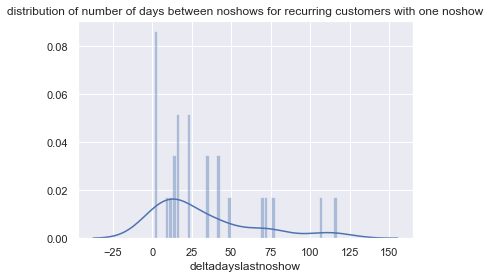

In [245]:
df=supermulti.copy()
df=df.loc[(df.deltadayslastnoshow!=0) & (df.noshowflag==1),:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadayslastnoshow']]
plt.title("distribution of number of days between noshows for recurring customers with one noshow")
ax=sns.distplot(df3.deltadayslastnoshow,norm_hist=True,bins=50)

The average number days between two noshows

In [244]:
df3.mean()

deltadayslastnoshow    32.56
dtype: float64

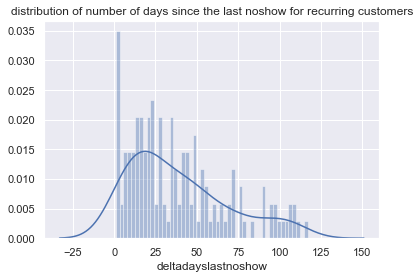

In [240]:
df=supermulti.copy()
df=df.loc[(df.deltadayslastnoshow!=0),:]
df2=df.groupby('clientdate')
df3=df2.first()[['deltadayslastnoshow']]
plt.title("distribution of number of days since the last noshow for recurring customers")
ax=sns.distplot(df3.deltadayslastnoshow,norm_hist=True,bins=50)

In [232]:
allcolumns=superbooking.columns
columnstoremove=['client', 'staff', 'service',
                'date', 'time', 'timeint', 'description','category',
                'canceldate', 'canceledby',
                'latecancellation', 'dayinweek', 'tdate', 'month', 'ttime', 'hour',
                'firstdate',  'lastnoshowdate',
       'lastnoshowhour', 'lastnoshowdayinweek', 'lastvisitdate',
       'lastvisithour', 'laststaff', 'lastvisitdayinweek', 'lastservice',
       'lastcategory',  'dayhourcombi', 'dayhourcount',
       'daycount', 'hourday', 'lastvisitdayhourcombi',
       'lastnoshowdayhourcombi', 'svcamt', 'lastsvcamt', 'svckey',
       'lastsvckey', 'lastservice2', 'lastcategory2', 'laststaff2','visit']
predictorlist = [x for x in allcolumns if x not in columnstoremove]
booking=superbooking[predictorlist].copy()

AttributeError: Cannot access callable attribute 'get' of 'DataFrameGroupBy' objects, try using the 'apply' method

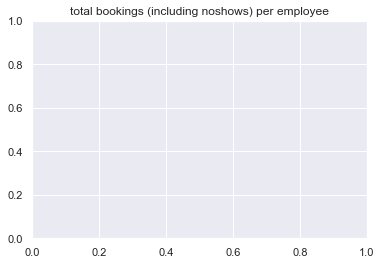

In [233]:
plt.title("total bookings (including noshows) per employee")
ax = sns.countplot(x="staff",hue="noshowflag",data=df2)

In [37]:
filepath = "C:/Users/moshe/Documents/projectML/p1/data/interim/bookingdescribe.xlsx"
booking2=booking[booking.newcustomer==1]
booking2.describe()
#booking.describe().to_excel(filepath)
#booking.describe()

,noshowflag,firstapp,newcustomer,deltadaysappt,last30dvisit,multipleappt,previousnoshow,last30dnoshow,last30dbillamt,last30dcolor,...,x7_SINEAD,x7_TANYA,x8_BECKY,x8_HOUSE,x8_JJ,x8_JOANNE,x8_KELLY,x8_NA,x8_SINEAD,x8_TANYA
count,888.000000,888.000000,888.0,888.0,888.0,888.000000,888.000000,888.000000,888.000000,888.0,...,888.000000,888.000000,888.0,888.0,888.0,888.0,888.0,888.0,888.0,888.0
mean,0.013514,0.970721,1.0,0.0,0.0,0.238739,0.029279,0.022523,0.036036,0.0,...,0.118243,0.011261,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,0.115525,0.168683,0.0,0.0,0.0,0.426553,0.168683,0.148459,1.073850,0.0,...,0.323078,0.105579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,1.000000,1.000000,1.0,0.0,0.0,1.000000,1.000000,1.000000,32.000000,0.0,...,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
final=booking.copy()

,noshowflag,newcustomer,deltadaysappt,last30dvisit,multipleappt,previousnoshow,last30dnoshow,last30dbillamt,last30dcolor,last30dstyle,...,x7_SINEAD,x7_TANYA,x8_BECKY,x8_HOUSE,x8_JJ,x8_JOANNE,x8_KELLY,x8_NA,x8_SINEAD,x8_TANYA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import pyMechkar as mechkar

In [13]:
mechkar.pyMechkar().exploreData(data=final)

Directory  report  already exists
Directory  report  already exists


C:\Users\moshe\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\moshe\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\moshe\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)


ValueError: cannot convert float NaN to integer